In [2]:
import matplotlib
import pandas as pd
import numpy as np
import xarray as xr
import clhs as cl
import matplotlib.pyplot as plt

In [4]:
ds = xr.tutorial.open_dataset('air_temperature')
df=ds["air"][0,:,:].to_dataframe().reset_index()[["lat","lon","air"]]
df["temp"]=df["air"]-273.15
df["rh"]=np.random.normal(50,12,1325).round(3)
df.head(10)

,lat,lon,air,temp,rh
0,75.0,200.0,241.20,-31.95,63.759
1,75.0,202.5,242.50,-30.65,58.402
2,75.0,205.0,243.50,-29.65,57.351
3,75.0,207.5,244.00,-29.15,44.188
4,75.0,210.0,244.10,-29.05,60.574
5,75.0,212.5,243.89,-29.26,75.579
6,75.0,215.0,243.60,-29.55,34.261
7,75.0,217.5,243.10,-30.05,55.879
8,75.0,220.0,242.50,-30.65,41.879
9,75.0,222.5,241.89,-31.26,51.190


: 

In [32]:
# set sample number
num_sample=15
# cLHS
sampled=cl.clhs(df[["temp","rh"]], num_sample, max_iterations=1000)
clhs_sample=df.iloc[sampled["sample_indices"]]
# random sample, as a comparison
random_sample=df.sample(num_sample)

cLHS:100%|██████████|1000/1000 [Elapsed time: 1.78371000289917, ETA: 0.0, 560.63it/s]                  


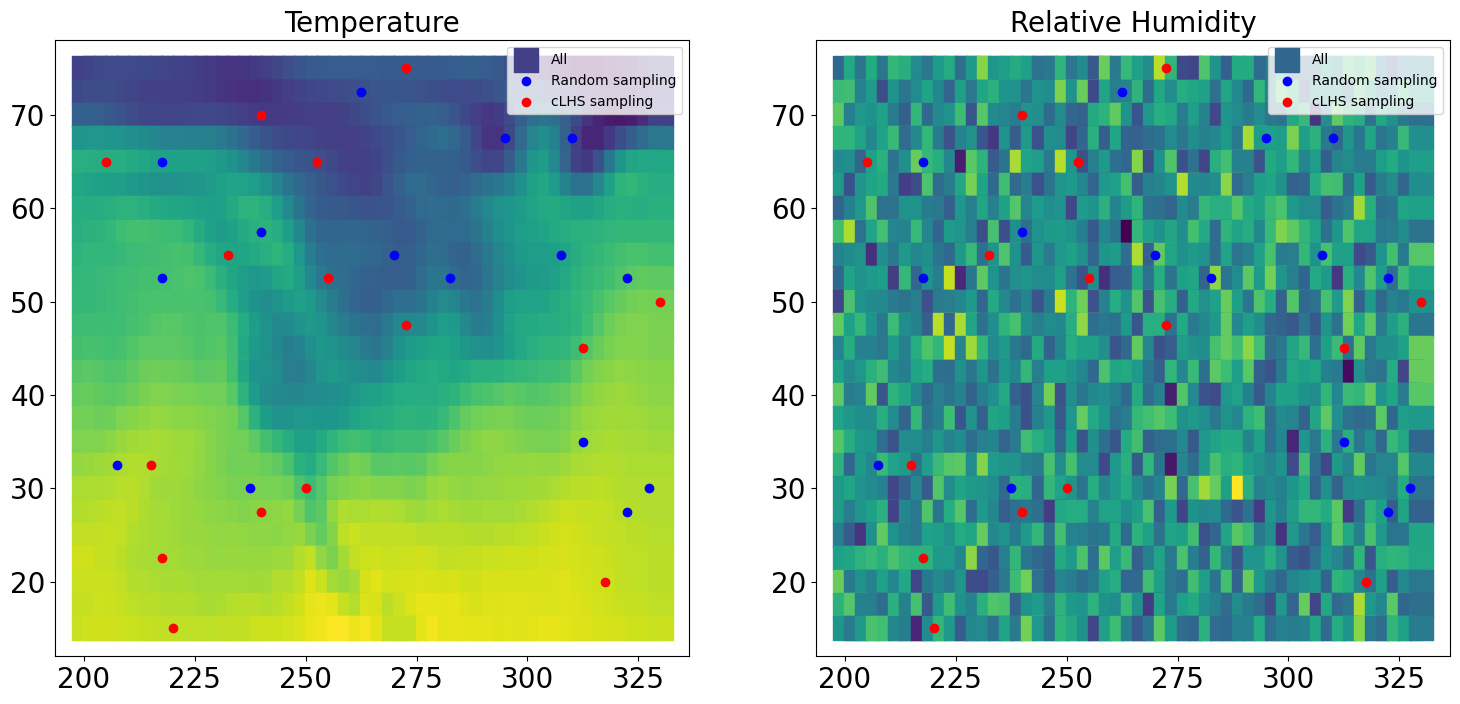

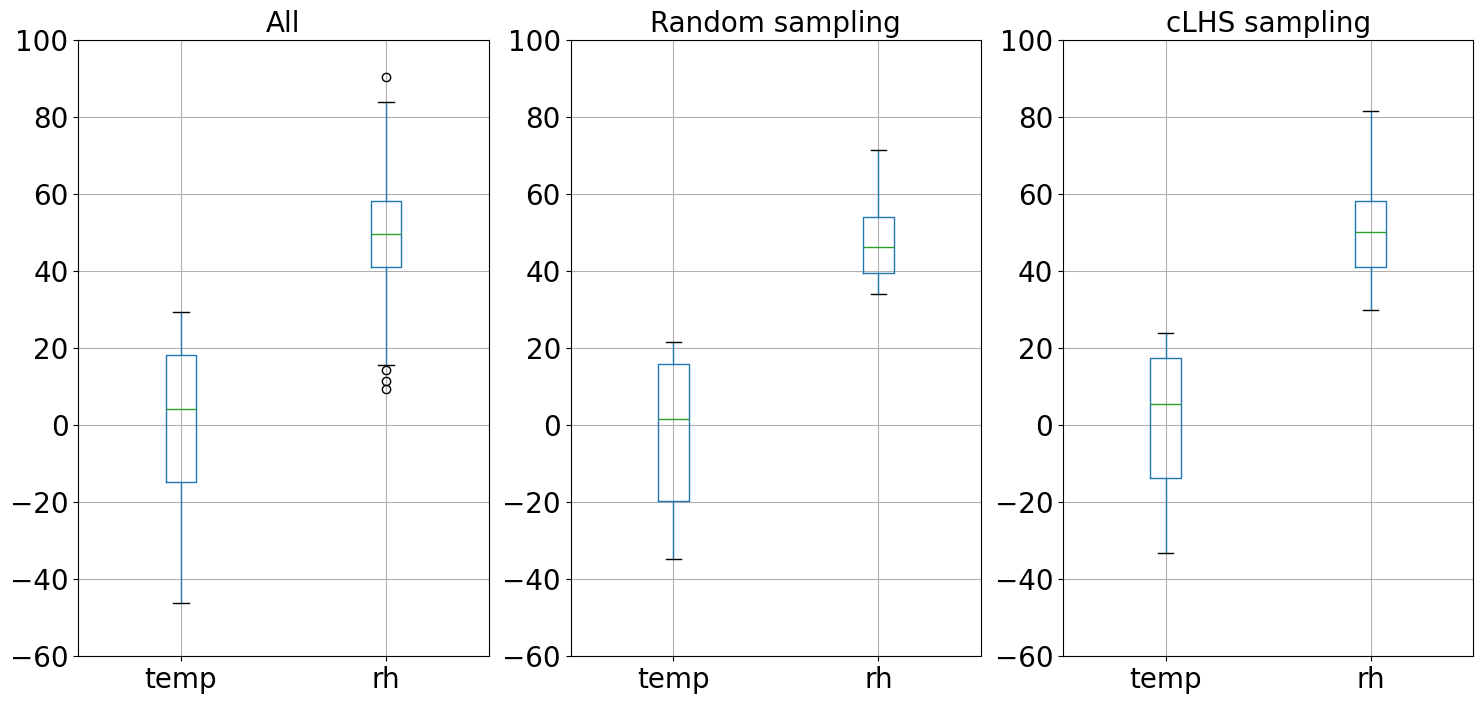

Overall
              temp           rh
count  1325.000000  1325.000000
mean      1.016272    49.762986
std      19.110955    12.315496
min     -46.150000     9.311000
25%     -14.860000    40.985000
50%       4.350000    49.753000
75%      18.250000    58.305000
max      29.450000    90.377000


Random sampling
            temp         rh
count  15.000000  15.000000
mean   -1.418667  47.318333
std    19.205709  10.361851
min   -34.850000  34.075000
25%   -19.600000  39.508000
50%     1.750000  46.387000
75%    15.845000  54.093500
max    21.640000  71.522000


cLHS sampling
            temp         rh
count  15.000000  15.000000
mean    1.115333  50.687800
std    19.267909  13.148254
min   -33.050000  30.064000
25%   -13.805000  41.237500
50%     5.640000  50.310000
75%    17.600000  58.361500
max    24.050000  81.590000




In [35]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(18,8))
# grafico temperatura
ax1.scatter(df["lon"],df["lat"],label="All",c=df["temp"],marker="s",s=300)
ax1.scatter(random_sample["lon"],random_sample["lat"],label="Random sampling",c="blue")
ax1.scatter(clhs_sample["lon"],
           clhs_sample["lat"],
           label="cLHS sampling",c="red")
ax1.legend()
ax1.set_title("Temperature",fontsize=20)
# grafico humedad
ax2.scatter(df["lon"],df["lat"],label="All",c=df["rh"],marker="s",s=300)
ax2.scatter(random_sample["lon"],random_sample["lat"],label="Random sampling",c="blue")
ax2.scatter(clhs_sample["lon"],
           clhs_sample["lat"],
           label="cLHS sampling",c="red")
ax2.legend()
ax2.set_title("Relative Humidity",fontsize=20)
plt.show()

# boxplots comparativo (datos totales, muestreo por hipercubo y muestreo aleatorio)
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(18,8))
df[["temp","rh"]].boxplot(ax=ax1)
random_sample[["temp","rh"]].boxplot(ax=ax2)
clhs_sample[["temp","rh"]].boxplot(ax=ax3)
ax1.set_ylim([-60,100])
ax1.set_title("All",fontsize=20)
ax2.set_ylim([-60,100])
ax2.set_title("Random sampling",fontsize=20)
ax3.set_ylim([-60,100])
ax3.set_title("cLHS sampling",fontsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
plt.show()
# estadisticas descriptivas de comparacion
print("Overall")
print(df[["temp","rh"]].describe())
print("\n")
print("Random sampling")
print(random_sample[["temp","rh"]].describe())
print("\n")
print("cLHS sampling")
print(clhs_sample[["temp","rh"]].describe())
print("\n")